In [1]:
import operator as op
from functools import reduce

def nCr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

In [2]:
N = 1000 # population size
n = 100 # first capture (tagging)
m = 100 # second capture

# what's the probability that among m recaptured, k are tagged
def binomial(k, n, m, N):
    p = n / N
    return nCr(m, k) * (p ** k) * ((1 - p) ** (m - k))

def naive(k, n, m, N):
    return nCr(n, k) * nCr(N - n, m - k) / nCr(N, m)

In [3]:
# if label entire population, guaranteed to get m tags out of m recapture
assert(binomial(m, N, m, N) == 1)
assert(naive(m, N, m, N) == 1)

In [4]:
ks = [k for k in range(m)]
p_b = [binomial(k, n, m, N) for k in ks]
p_n = [naive(k, n, m, N) for k in ks]

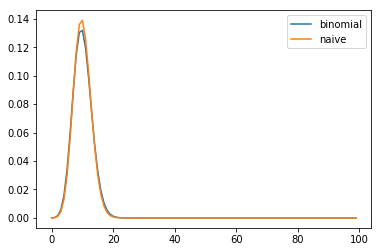

In [6]:
import matplotlib.pyplot as plt

plt.plot(ks, p_b)
plt.plot(ks, p_n)
plt.legend(["binomial", "naive"])

plt.show()